In [55]:
#Imports
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import os
from urllib.request import urlretrieve
from tqdm import tqdm

In [56]:
# Download datasets
url = "http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data_10_percent.gz"  #KDD cup'99 dataset
filename = "kddcup.data_10_percent.gz"
urlretrieve(url, filename)

train_url = "https://github.com/jmnwong/NSL-KDD-Dataset/raw/master/KDDTrain+.txt" #Train Dataset of NSL-KDD Dataset
test_url = "https://github.com/jmnwong/NSL-KDD-Dataset/raw/master/KDDTest+.txt"   #Test dataset of NSL-KDD Dataset

train_file = "KDDTrain+.txt"
test_file = "KDDTest+.txt"

if not os.path.exists(filename):
    print("Downloading 10% KDD Cup'99 dataset...")
    urlretrieve(train_url, train_file)
if not os.path.exists(train_file):
    print("Downloading training dataset of NSL-KDD...")
    urlretrieve(train_url, train_file)
if not os.path.exists(test_file):
    print("Downloading testing dataset of NSL-KDD...")
    urlretrieve(test_url, test_file)
print('Datasets have been downloaded.')

Datasets have been downloaded.


In [57]:
#Function written to plot confusion matrix using matplotlib and seaborn
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "Attack"], yticklabels=["Normal", "Attack"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.show()

In [58]:
def calculateAndDisplayEvaluationMetrics(y_true, y_pred, title):
    accuracy = accuracy_score(y_true, y_pred)*100
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"{title} Metrics:")
    print(f"Accuracy: {accuracy:.2f}%")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    plot_confusion_matrix(y_true, y_pred, title)

In [59]:
# (a) Evluating on 1st dataset- KDD Cup '99

#defining columns (naming each of the 41 features+ the target label vector)
KDDCup_columns = [
    "duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes",
    "land", "wrong_fragment", "urgent", "hot", "num_failed_logins", "logged_in",
    "num_compromised", "root_shell", "su_attempted", "num_root", "num_file_creations",
    "num_shells", "num_access_files", "num_outbound_cmds", "is_host_login",
    "is_guest_login", "count", "srv_count", "serror_rate", "srv_serror_rate",
    "rerror_rate", "srv_rerror_rate", "same_srv_rate", "diff_srv_rate",
    "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count",
    "dst_host_same_srv_rate", "dst_host_diff_srv_rate", "dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate", "dst_host_serror_rate", "dst_host_srv_serror_rate",
    "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "label"
]

# Loading dataset in dataframe using pandas
df = pd.read_csv(filename, names=KDDCup_columns)

#Removes duplicate rows(data cleaning)
print(df.shape)
df = df.drop_duplicates()  
print(df.shape)

print(df['label'].value_counts().to_dict())  # Returns all unique labels in the dataset with their count as a 

#Therefore, we can see that the KDD Dataset contains lot of redundant(duplicate) data and is highly imbalanced



(494021, 42)
(145586, 42)
{'normal.': 87832, 'neptune.': 51820, 'back.': 968, 'teardrop.': 918, 'satan.': 906, 'warezclient.': 893, 'ipsweep.': 651, 'smurf.': 641, 'portsweep.': 416, 'pod.': 206, 'nmap.': 158, 'guess_passwd.': 53, 'buffer_overflow.': 30, 'warezmaster.': 20, 'land.': 19, 'imap.': 12, 'rootkit.': 10, 'loadmodule.': 9, 'ftp_write.': 8, 'multihop.': 7, 'phf.': 4, 'perl.': 3, 'spy.': 2}


In [60]:
# Preprocessing Data

# Convert categorical columns using Label Encoding
categorical_cols = ["protocol_type", "service", "flag"]
encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

# Convert labels to binary: 0 for normal, 1 for attack
df["label"] = df["label"].apply(lambda x: 0 if x == "normal." else 1)

# Extract features and labels
X = df.drop("label", axis=1).values
y = df["label"].values

# Splitting into training, validation and test data set (60-20-20)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, stratify=y, random_state=42
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42
)

# Normalize features
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)  # Fit on training data
X_val = scaler.transform(X_val)          # Apply same transformation to validation
X_test = scaler.transform(X_test)        # Apply same transformation to test






--- KDD Cup '99 - Hyperparameter Tuning ---

Testing with distance metric: euclidean


PCA Components (euclidean):   0%|          | 0/8 [00:00<?, ?it/s]

PCA Components (euclidean): 100%|██████████| 8/8 [03:21<00:00, 25.16s/it]


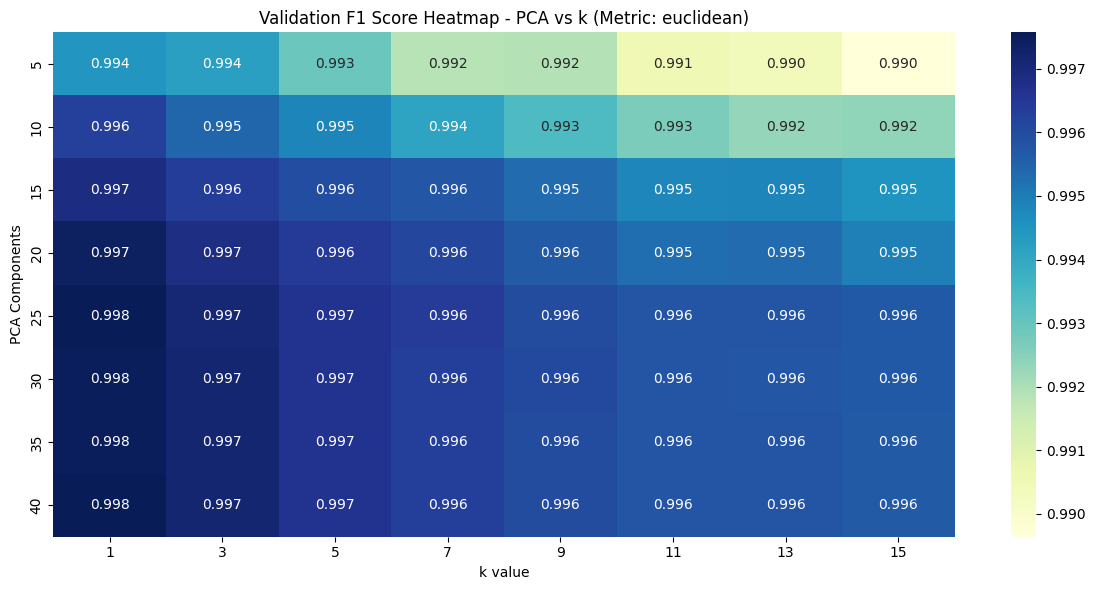


Best Validation F1 Score (euclidean): 0.9976 with PCA = 25, k = 1

Testing with distance metric: manhattan


PCA Components (manhattan): 100%|██████████| 8/8 [09:59<00:00, 74.93s/it] 


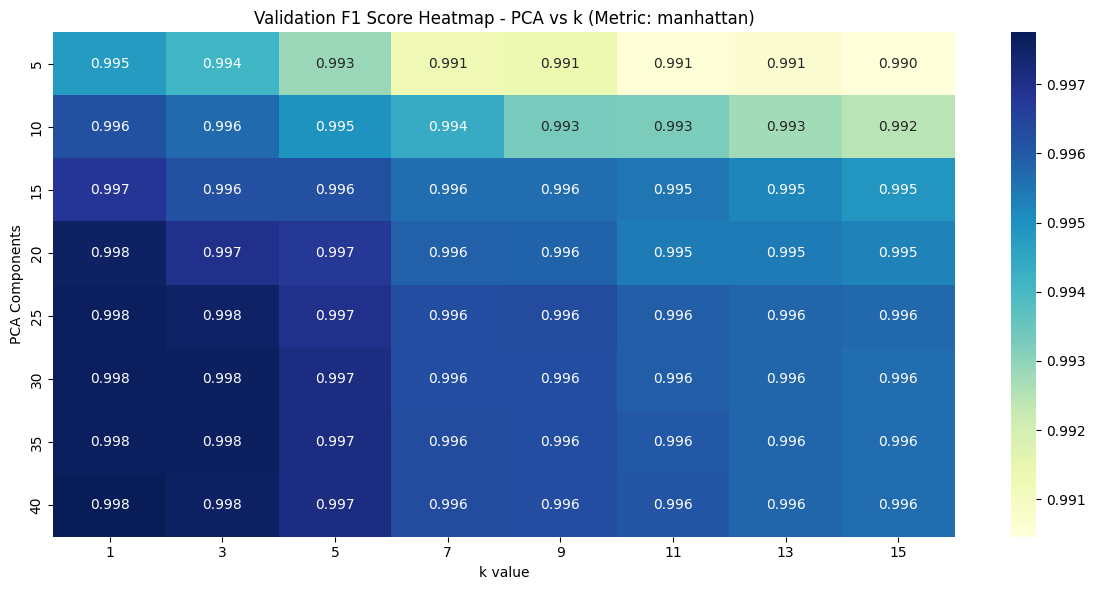


Best Validation F1 Score (manhattan): 0.9977 with PCA = 40, k = 1

Overall best configuration for KDD Cup '99:
Distance metric: manhattan
Number of PCA components: 40
k value: 1
Validation F1 Score: 0.9977


In [62]:
# Define hyperparameter ranges for tuning
component_list = list(range(5, 41, 5))  # PCA components: 5, 10, 15, 20, 25, 30, 35, 40
k_list = list(range(1, 16, 2))          # k values: 1, 3, 5, 7, 9, 11, 13, 15
distance_metrics = ['euclidean', 'manhattan']

print("\n\n--- KDD Cup '99 - Hyperparameter Tuning ---")
results_kdd = {}

for metric in distance_metrics:
    print(f"\nTesting with distance metric: {metric}")
    
    f1_val_matrix = np.zeros((len(component_list), len(k_list)))

    best_score = 0
    best_k = None
    best_n_components = None

    for i, n in enumerate(tqdm(component_list, desc=f"PCA Components ({metric})")):
        # Fit PCA only on training data
        pca = PCA(n_components=n)
        X_train_pca = pca.fit_transform(X_train)
        X_val_pca = pca.transform(X_val)

        for j, k in enumerate(tqdm(k_list, leave=False, desc=f"k values (PCA={n})")):
            knn = KNeighborsClassifier(n_neighbors=k, metric=metric, n_jobs=-1)
            knn.fit(X_train_pca, y_train)

            # Evaluate on validation data
            y_val_pred = knn.predict(X_val_pca)
            val_score = f1_score(y_val, y_val_pred)
            f1_val_matrix[i, j] = val_score

            if val_score > best_score:
                best_score = val_score
                best_k = k
                best_n_components = n

    # Store results
    results_kdd[metric] = {
        "f1_val_matrix": f1_val_matrix,
        "best_f1_val": best_score,
        "best_k": best_k,
        "best_n_components": best_n_components
    }

    # Plot validation heatmap
    plt.figure(figsize=(12, 6))
    sns.heatmap(f1_val_matrix, annot=True, fmt=".3f", cmap="YlGnBu",
                xticklabels=k_list, yticklabels=component_list)
    plt.title(f"Validation F1 Score Heatmap - PCA vs k (Metric: {metric})")
    plt.xlabel("k value")
    plt.ylabel("PCA Components")
    plt.tight_layout()
    plt.show()

    print(f"\nBest Validation F1 Score ({metric}): {best_score:.4f} with PCA = {best_n_components}, k = {best_k}")

# Find the overall best metric
best_metric = max(results_kdd, key=lambda x: results_kdd[x]["best_f1_val"])
best_params_kdd = results_kdd[best_metric]

print(f"\nOverall best configuration for KDD Cup '99:")
print(f"Distance metric: {best_metric}")
print(f"Number of PCA components: {best_params_kdd['best_n_components']}")
print(f"k value: {best_params_kdd['best_k']}")
print(f"Validation F1 Score: {best_params_kdd['best_f1_val']:.4f}")



--- KDD Cup '99 Results with Best Model ---
Training Set Metrics:
Accuracy: 100.00%
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


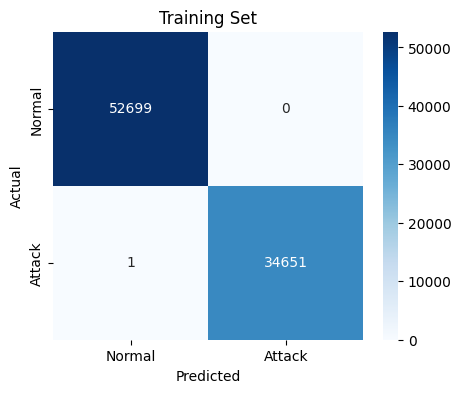

Validation Set Metrics:
Accuracy: 99.82%
Precision: 0.9977
Recall: 0.9978
F1 Score: 0.9977


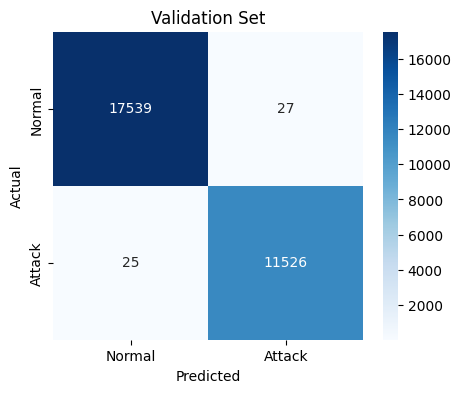

Test Set Metrics:
Accuracy: 99.81%
Precision: 0.9974
Recall: 0.9978
F1 Score: 0.9976


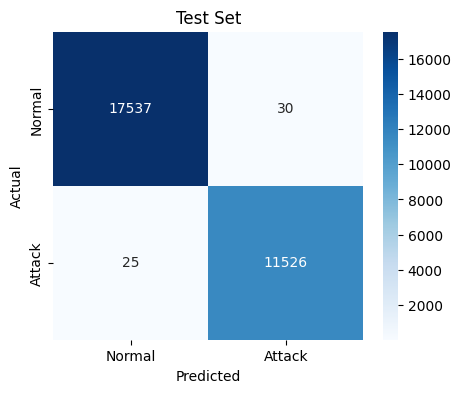

In [63]:
# Evaluate the best model on all three sets
pca = PCA(n_components=best_params_kdd['best_n_components'])
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=best_params_kdd['best_k'], metric=best_metric, n_jobs=-1)  
knn.fit(X_train_pca, y_train)

# Get predictions for all sets
y_train_pred = knn.predict(X_train_pca)
y_val_pred = knn.predict(X_val_pca)
y_test_pred = knn.predict(X_test_pca)

# Calculate metrics for all sets
print("\n--- KDD Cup '99 Results with Best Model ---")
train_metrics = calculateAndDisplayEvaluationMetrics(y_train, y_train_pred, "Training Set")
val_metrics = calculateAndDisplayEvaluationMetrics(y_val, y_val_pred, "Validation Set")
test_metrics = calculateAndDisplayEvaluationMetrics(y_test, y_test_pred, "Test Set")

In [64]:
# (B) Evaluating on 2nd dataset- NSL-KDD

KDDNSL_columns = [
    "duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes",
    "land", "wrong_fragment", "urgent", "hot", "num_failed_logins", "logged_in",
    "num_compromised", "root_shell", "su_attempted", "num_root", "num_file_creations",
    "num_shells", "num_access_files", "num_outbound_cmds", "is_host_login",
    "is_guest_login", "count", "srv_count", "serror_rate", "srv_serror_rate",
    "rerror_rate", "srv_rerror_rate", "same_srv_rate", "diff_srv_rate",
    "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count",
    "dst_host_same_srv_rate", "dst_host_diff_srv_rate",
    "dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate",
    "dst_host_serror_rate", "dst_host_srv_serror_rate", "dst_host_rerror_rate",
    "dst_host_srv_rerror_rate", "class", "difficulty"
]

#Converting train and test files into dataframes
train_df = pd.read_csv(train_file, names=KDDNSL_columns, header=None) 
test_df = pd.read_csv(test_file, names=KDDNSL_columns, header=None)

#Dropping the difficulty column as not relevant for training
train_df.drop("difficulty", axis=1, inplace=True)
test_df.drop("difficulty", axis=1, inplace=True)

#Removes duplicate rows(data cleaning)
print(df.shape)
df = df.drop_duplicates()  
print(df.shape)

print(train_df['class'].value_counts().to_dict())  # Returns all unique labels in the dataset with their count as a dictionary

#Clearly, we can see that this dataset is more balanced and does not contain duplicates as such



(145586, 42)
(145585, 42)
{'normal': 67343, 'neptune': 41214, 'satan': 3633, 'ipsweep': 3599, 'portsweep': 2931, 'smurf': 2646, 'nmap': 1493, 'back': 956, 'teardrop': 892, 'warezclient': 890, 'pod': 201, 'guess_passwd': 53, 'buffer_overflow': 30, 'warezmaster': 20, 'land': 18, 'imap': 11, 'rootkit': 10, 'loadmodule': 9, 'ftp_write': 8, 'multihop': 7, 'phf': 4, 'perl': 3, 'spy': 2}


In [65]:
#Data Preprocessing

# Label encode categorical columns(to convert features to numerical values)
categorical_cols = ["protocol_type", "service", "flag"]
encoder = LabelEncoder()

for col in categorical_cols:
    train_df[col] = encoder.fit_transform(train_df[col])  # Fit + transform on train
    test_df[col] = encoder.transform(test_df[col])  # Transform only on test (NO FIT)

# Convert class labels to binary (0 for normal, 1 for attack)
train_df["class"] = train_df["class"].apply(lambda x: 0 if x == "normal" else 1)
test_df["class"] = test_df["class"].apply(lambda x: 0 if x == "normal" else 1)

X_train_full = train_df.drop("class", axis=1).values
y_train_full = train_df["class"].values
X_test = test_df.drop("class", axis=1).values
y_test = test_df["class"].values

# Split train into 70% train and 30% validation
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.3, stratify=y_train_full, random_state=42
)

# Step 2: Scale (only fit on training set!)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)   # Fit + transform on training
X_val = scaler.transform(X_val)           # Only transform on val
X_test = scaler.transform(X_test)         # Only transform on test



--- NSL KDD - Hyperparameter Tuning ---

Testing with distance metric: euclidean


PCA Components (euclidean): 100%|██████████| 8/8 [05:28<00:00, 41.12s/it]


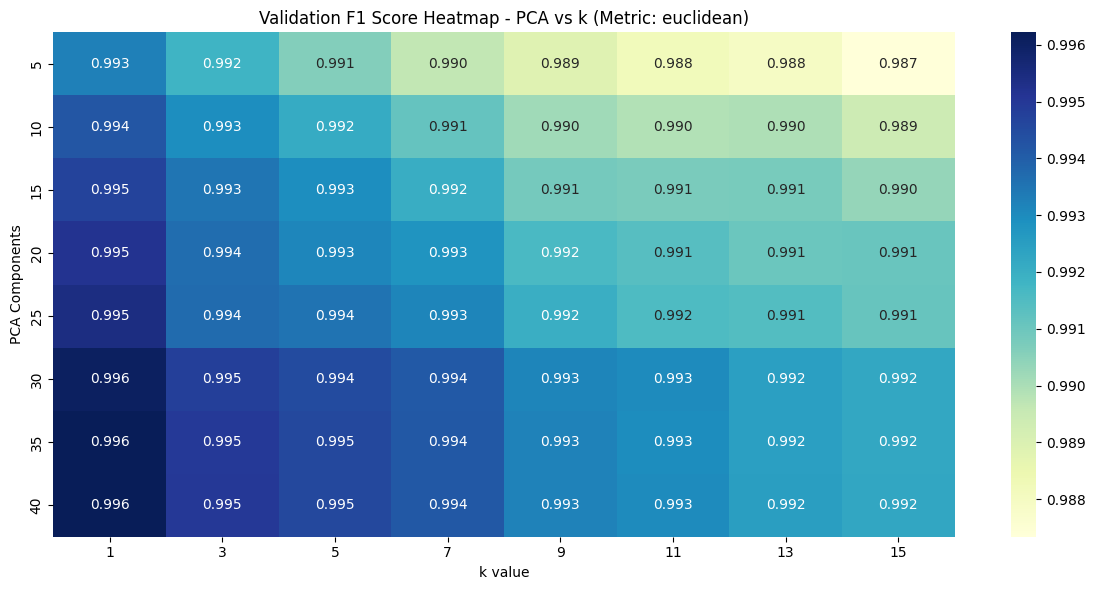


Best Validation F1 Score (euclidean): 0.9962 with PCA = 40, k = 1

Testing with distance metric: manhattan


PCA Components (manhattan): 100%|██████████| 8/8 [13:47<00:00, 103.44s/it]


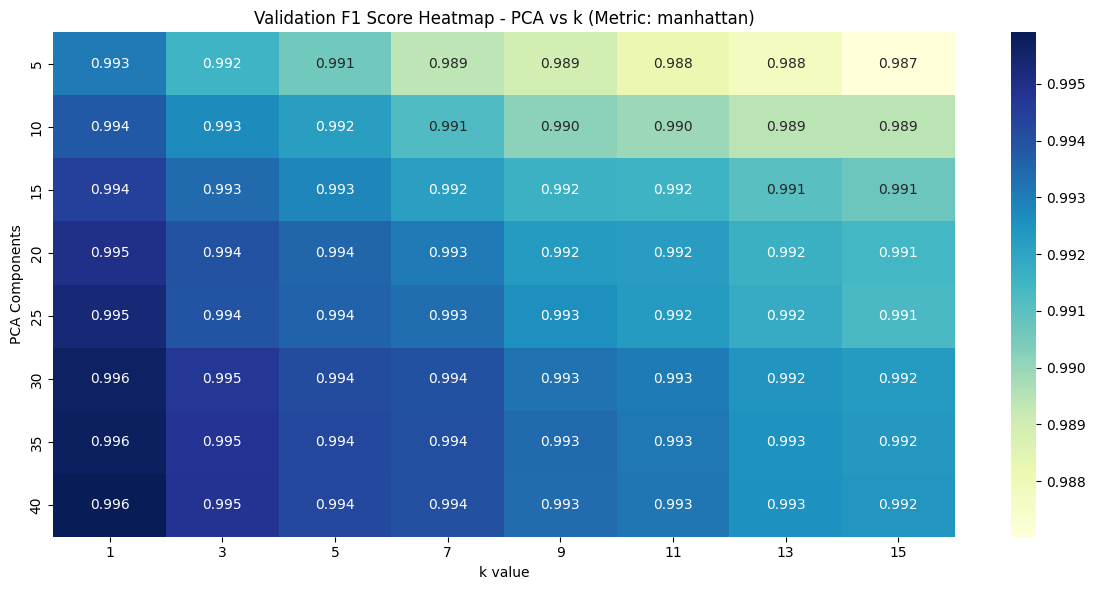


Best Validation F1 Score (manhattan): 0.9959 with PCA = 40, k = 1

Overall best configuration for NSL KDD:
Distance metric: euclidean
Number of PCA components: 40
k value: 1
Validation F1 Score: 0.9962


In [67]:
# Define hyperparameter ranges for tuning
component_list = list(range(5, 41, 5))  # PCA components: 5, 10, 15, 20, 25, 30, 35, 40
k_list = list(range(1, 16, 2))          # k values: 1, 3, 5, 7, 9, 11, 13, 15
distance_metrics = ['euclidean', 'manhattan']

print("\n\n--- NSL KDD - Hyperparameter Tuning ---")
results_kdd = {}

for metric in distance_metrics:
    print(f"\nTesting with distance metric: {metric}")
    
    f1_val_matrix = np.zeros((len(component_list), len(k_list)))

    best_score = 0
    best_k = None
    best_n_components = None

    for i, n in enumerate(tqdm(component_list, desc=f"PCA Components ({metric})")):
        # Fit PCA only on training data
        pca = PCA(n_components=n)
        X_train_pca = pca.fit_transform(X_train)
        X_val_pca = pca.transform(X_val)

        for j, k in enumerate(tqdm(k_list, leave=False, desc=f"k values (PCA={n})")):
            knn = KNeighborsClassifier(n_neighbors=k, metric=metric, n_jobs=-1)
            knn.fit(X_train_pca, y_train)

            # Evaluate on validation data
            y_val_pred = knn.predict(X_val_pca)
            val_score = f1_score(y_val, y_val_pred)
            f1_val_matrix[i, j] = val_score

            if val_score > best_score:
                best_score = val_score
                best_k = k
                best_n_components = n

    # Store results
    results_kdd[metric] = {
        "f1_val_matrix": f1_val_matrix,
        "best_f1_val": best_score,
        "best_k": best_k,
        "best_n_components": best_n_components
    }

    # Plot validation heatmap
    plt.figure(figsize=(12, 6))
    sns.heatmap(f1_val_matrix, annot=True, fmt=".3f", cmap="YlGnBu",
                xticklabels=k_list, yticklabels=component_list)
    plt.title(f"Validation F1 Score Heatmap - PCA vs k (Metric: {metric})")
    plt.xlabel("k value")
    plt.ylabel("PCA Components")
    plt.tight_layout()
    plt.show()

    print(f"\nBest Validation F1 Score ({metric}): {best_score:.4f} with PCA = {best_n_components}, k = {best_k}")

# Find the overall best metric
best_metric = max(results_kdd, key=lambda x: results_kdd[x]["best_f1_val"])
best_params_kdd = results_kdd[best_metric]

print(f"\nOverall best configuration for NSL KDD:")
print(f"Distance metric: {best_metric}")
print(f"Number of PCA components: {best_params_kdd['best_n_components']}")
print(f"k value: {best_params_kdd['best_k']}")
print(f"Validation F1 Score: {best_params_kdd['best_f1_val']:.4f}")



--- NSL KDD Results with Best Model ---
Training Set Metrics:
Accuracy: 99.99%
Precision: 0.9999
Recall: 0.9998
F1 Score: 0.9999


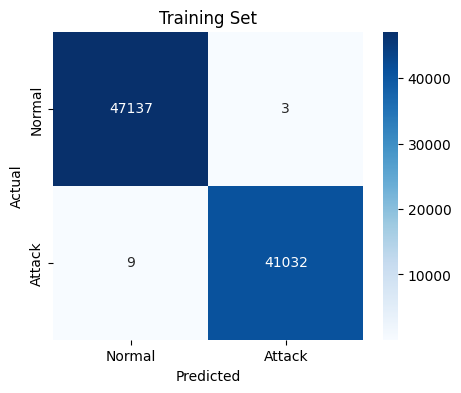

Validation Set Metrics:
Accuracy: 99.65%
Precision: 0.9959
Recall: 0.9966
F1 Score: 0.9962


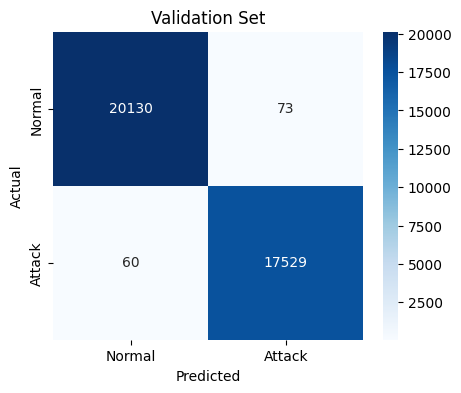

Test Set Metrics:
Accuracy: 78.87%
Precision: 0.9736
Recall: 0.6464
F1 Score: 0.7769


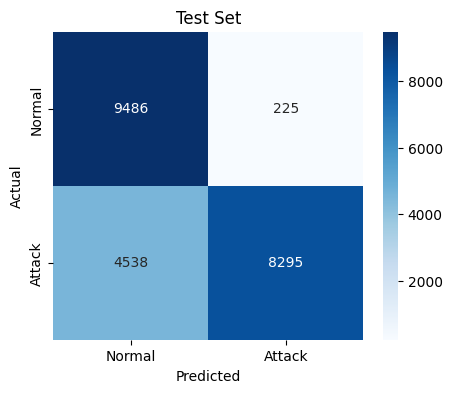

In [68]:
# Evaluate the best model on all three sets
pca = PCA(n_components=best_params_kdd['best_n_components'])
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=best_params_kdd['best_k'], metric=best_metric, n_jobs=-1)  
knn.fit(X_train_pca, y_train)

# Get predictions for all sets
y_train_pred = knn.predict(X_train_pca)
y_val_pred = knn.predict(X_val_pca)
y_test_pred = knn.predict(X_test_pca)

# Calculate metrics for all sets
print("\n--- NSL KDD Results with Best Model ---")
train_metrics = calculateAndDisplayEvaluationMetrics(y_train, y_train_pred, "Training Set")
val_metrics = calculateAndDisplayEvaluationMetrics(y_val, y_val_pred, "Validation Set")
test_metrics = calculateAndDisplayEvaluationMetrics(y_test, y_test_pred, "Test Set")